In [15]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 8]


Text(0, 0.5, 'y')

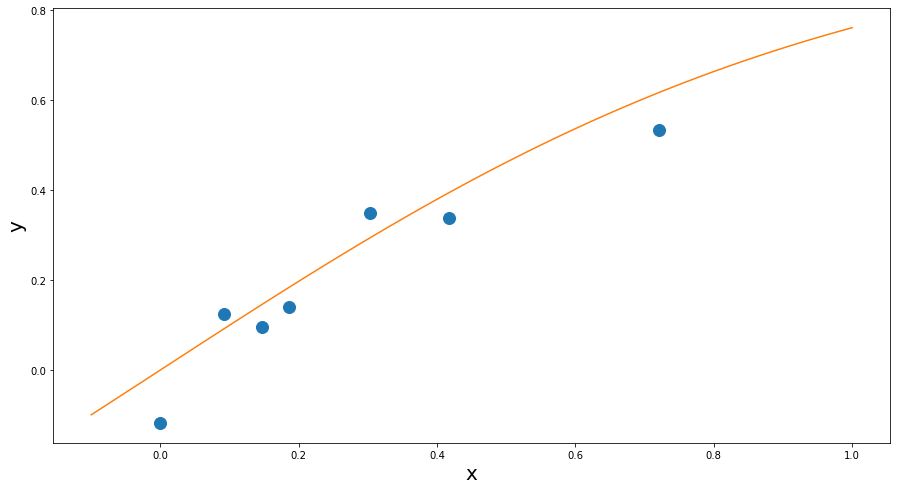

In [16]:
#Create dataset

np.random.seed(1)

sample_size = 7

x = np.random.uniform(low = 0.0, high = 1.0, size = sample_size)
y = np.tanh(x) + np.random.normal(scale = 0.05, size = sample_size)

run_x = np.linspace(-0.1, 1)
gt = np.tanh(run_x)

# Plot
plt.plot(x,y, 'o', markersize=12)
plt.plot(run_x, gt, )
plt.xlabel("x", fontsize = 20)
plt.ylabel("y", fontsize = 20)


Estimated coefficients:
b_0 = 1.2181818181818187         
b_1 = 1.0363636363636364


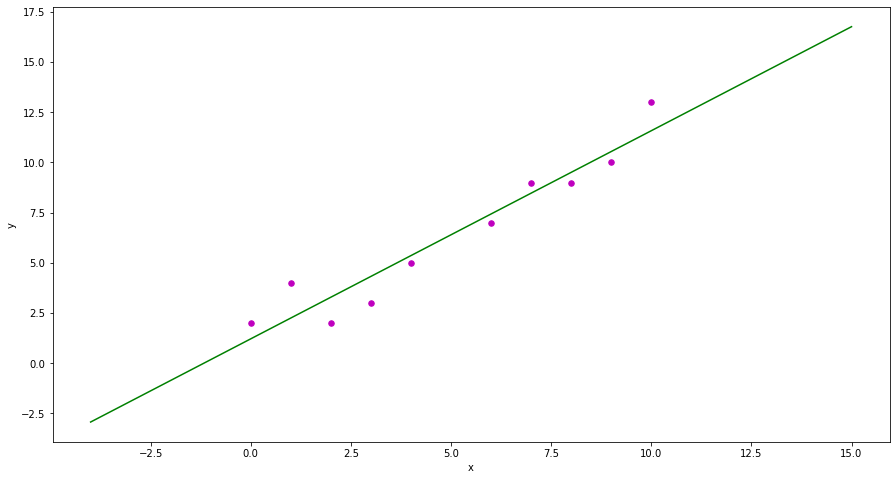

In [17]:
# Example of linear regression (manually)

# Function to estimate the coefficients of a linear regression with two parameters
#
# Input:
#       x        :   points x-values (array)
#       y        :   points y-values (array)
#
# Output: 
#   (b_0, b_1)   :   Coefficient vector (bias, slope)

def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)

    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)

    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x

    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x

    return (b_0, b_1)


# Function to plot the results of the regression
#
# Input:
#       x        :   points x-values (array)
#       y        :   points y-values (array)
#       b        :   Coefficient vector (bias, slope)


def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
            marker = "o", s = 30)

    # predicted response vector
    y_pred = b[0] + b[1]*x

    # plotting the regression line
    plt.plot(x_lin, y_lin, color = "g")

    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')

    # function to show plot
    plt.show()
    
    
# Main function to call the fitting function and plot the results with the data
def main():
    # observations / data
    x = np.array([0, 3, 2, 1, 4, 6, 7, 8, 9, 10])
    y = np.array([2, 3, 2, 4, 5, 7, 9, 9, 10, 13])

    # estimating coefficients
    b = estimate_coef(x, y)
    print("Estimated coefficients:\nb_0 = {} \
        \nb_1 = {}".format(b[0], b[1]))

    # plotting regression line
    plot_regression_line(x, y, b)

    
if __name__ == "__main__":
    main()


In [ ]:
# Example of linear regression (manually)

import numpy as np
import matplotlib.pyplot as plt

def estimate_coef(x, y):

    '''
    '''

	return (b_0, b_1)

def plot_regression_line(x, y, b):

    '''
    '''

	# function to show plot
	plt.show()

def main():
	# observations / data
	x = np.array([0, 3, 2, 1, 4, 6, 7, 8, 9, 10])
	y = np.array([2, 3, 2, 4, 5, 7, 9, 9, 10, 13])

    '''
    '''

if __name__ == "__main__":
	main()


In [ ]:
# Automatic linear regression with sklearn

from sklearn.linear_model import LinearRegression

# Create the dataset
np.random.seed(1)

sample_size = 7
x = np.random.uniform(low = 0.0, high = 6.0, size = sample_size)
y = np.sin(x) + np.random.normal(scale = 0.05, size = sample_size)

run_x = np.linspace(-0.1, 6, num = 100)
gt = np.sin(run_x)

# Reshape x to use it in sklearn
X = x.reshape(sample_size, 1)

# Create the model and fit it
regression = LinearRegression()
regression.fit(X, y)

print("Regression score (residual sum of squares):", regression.score(X, y))
print("Regression coefficient: ", regression.coef_)
print("Intercept: ", regression.intercept_)


# Plot the data and the results of the regression

y_test = regression.predict(run_x.reshape(len(run_x), 1))

plt.plot(x,y, 'o', markersize=12, label = "Data")
plt.plot(run_x, gt, '--', label = "Ground truth")
plt.plot(run_x, y_test, label = "Model prediction")
plt.legend(loc="upper right", prop={'size': 20})
plt.xlabel("x", fontsize = 20)
plt.ylabel("y", fontsize = 20)



In [ ]:
import numpy
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(1)

sample_size = 200
x = np.random.uniform(low = 0.0, high = 6.0, size = sample_size)
y = np.sin(x) + np.random.normal(scale = 0.1, size = sample_size)


# Redefine X to include the square of the values
X = np.array([x, np.square(x)]).reshape(sample_size, 2)

poly_reg = PolynomialFeatures(degree = 9)
X_poly = poly_reg.fit_transform(x.reshape(-1, 1))
poly_reg.fit(X_poly,y)
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly,y)


# Plot the data and the results of the regression
x_grid = np.linspace(-0.1, 6, num = 300)
gt = np.sin(x_grid)

X_test = poly_reg.fit_transform(x_grid.reshape(-1, 1))
y_test = lin_reg2.predict(X_test)

plt.plot(x,y, '.', markersize=12, label = "Data")
plt.plot(x_grid, gt, '--', label = "Ground truth", linewidth=4)
plt.plot(x_grid, y_test, label = "Model prediction", linewidth=4)

plt.legend(loc="lower left", prop={'size': 20})
plt.xlabel("x", fontsize = 20)
plt.ylabel("y", fontsize = 20)
# plt.xlim((0,4))
# plt.ylim((-5,5))

# Ridge regression example

In [ ]:
# Perform Ridge regression using a pre-saved dataset 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import datasets

In [ ]:
# Load the dataset
ds = datasets.load_diabetes()
X = ds.data
y = ds.target

In [ ]:
# Create a training and test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Fit a pipeline using Training dataset and related labels
# Use Ridge, Lasso and the basic algorithm for training the model

pipeline = make_pipeline(StandardScaler(), LinearRegression())
pipeline.fit(X_train, y_train)

pipeline_lasso = make_pipeline(StandardScaler(), Lasso(alpha=1.0))
pipeline_lasso.fit(X_train, y_train)

pipeline_ridge = make_pipeline(StandardScaler(), Ridge(alpha=10.0))
pipeline_ridge.fit(X_train, y_train)

In [ ]:
# Calculate the predicted value for training and test dataset

y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

y_train_pred_lasso = pipeline_lasso.predict(X_train)
y_test_pred_lasso = pipeline_lasso.predict(X_test)

y_train_pred_ridge = pipeline_ridge.predict(X_train)
y_test_pred_ridge = pipeline_ridge.predict(X_test)

In [ ]:
# Mean Squared Error

print('LR: MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred), 
                                       mean_squared_error(y_test, y_test_pred)))

print('LASSO: MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred_lasso), 
                                       mean_squared_error(y_test, y_test_pred_lasso)))

print('RIDGE: MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred_ridge), 
                                       mean_squared_error(y_test, y_test_pred_ridge)))